## Known Issue
The code currently crashes when running the patchy cloud configuration (one patch with a clear atmosphere and one with clouds).

In [1]:
import os 
import test_module
from collections import namedtuple
import numpy as np
import retrieval_run
import settings
import cloud_dic
import utils
import test_module
import brewtools

In [2]:
# instrument

fwhm=555
wavelength_range=[0.95,2.85]
ndata=1
Rfile='./examples/example_data/G570D_R_file.txt'



#retrieval_params

##gas
chemeq=0
# gaslist = ['h2o','co','tio','vo','crh','feh','na','k']
gaslist = ['h2o','ch4']
gastype_list=['U','U']
ptype=7  


cloudpath='/Users/fw23aao/Downloads/cloud_pickles/'

## clouds

do_clouds=1


npatches=2
# List of all cloud names in the atmosphere.
# Format: 
#   - For general types, just a descriptive name. like power law cloud slab, powerlaw cloud deck,
# grey cloud deck, grey cloud slab
#   - For Mie scattering clouds, specify species after `--`, e.g., 'Mie scattering cloud deck--Al2O3'
cloud_name = ['clear',     # A clear atmosphere case (no cloud)
    'MgSiO3.mieff',   # A MgSiO3 Mie scattering cloud slab
                              
]

cloud_type=["None","slab"]


# Specify which cloud belongs to which patch.
# Each sublist corresponds to an entry in `cloudname`.
# Use [1] for patch 1, [2] for patch 2, or [1,2] if the cloud exists in both.

cloudpatch_index = [
    [1],      # 'clear' appears only in patch 1
    [2]       # 'Mie scattering cloud deck--Al2O3' appears in patch 2
]

# List of particle distributions associated with each cloud in `cloudname`.
# Use 'None' for non-Mie clouds or clouds without particle size distributions.
# For Mie clouds, specify the distribution model 'hansan' or 'log_normal'.)
particle_dis = [
    'None',   # No particle distribution for clear 
    'hansen' # Mie cloud uses 'hansen' particle size distribution
        
]



# ModelConfig:
do_fudge=1
samplemode='mcmc'

# instrument_instance = utils_dev.Instrument(fwhm,wavelength_range,ndata,Rfile)
# re_params = utils_dev.Retrieval_params(samplemode,chemeq,gaslist,gastype_list,fwhm,do_fudge,ptype,do_clouds,npatches,cloudname,cloudpacth_index,particle_dis)
# model_config_instance = utils_dev.ModelConfig(samplemode,do_fudge)
# io_config_instance = utils_dev.IOConfig()

instrument_instance = utils.Instrument(fwhm,wavelength_range,ndata,None, Rfile)
re_params = utils.Retrieval_params(samplemode,chemeq,gaslist,gastype_list,fwhm,do_fudge,ptype,do_clouds,npatches,cloud_name,cloud_type,cloudpatch_index,particle_dis, instrument_instance)
model_config_instance = utils.ModelConfig(samplemode,do_fudge,cloudpath=cloudpath)
io_config_instance = utils.IOConfig()




model_config_instance.dist= 5.84
model_config_instance.xlist ='data/gaslistRox.dat'
model_config_instance.xpath ='../../Linelists/'
model_config_instance.do_bff=0
model_config_instance.malk=1
model_config_instance.ch4=0
model_config_instance.update_dictionary()

In [3]:
obspec = np.asfortranarray(np.loadtxt("./examples/example_data/G570D_2MHcalib.dat",dtype='d',unpack='true')) # G570D_2MassJcalib.dat
args_instance = utils.ArgsGen(re_params,model_config_instance,instrument_instance,obspec)
settings.init(args_instance)

In [4]:
np.shape(args_instance.cloudname_set),args_instance.cloudname_set

((1,), ['Mie scattering cloud slab--MgSiO3.mieff'])

In [5]:
np.shape(args_instance.cloud_opaname),args_instance.cloud_opaname

((1,), array(['MgSiO3.mieff'], dtype=object))

In [6]:
np.shape(args_instance.cloudmap),args_instance.cloudmap

((2, 1),
 array([[0],
        [1]]))

In [7]:
args_instance.cloudata[0,0,0],np.shape(args_instance.cloudata[0,0,0])

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e-12, 2.00000000e-12, 5.00000000e-12,
        1.30000000e-11, 3.70000000e-11, 1.06000000e-10, 3.04000000e-10,
        8.69000000e-10, 2.48700000e-09, 7.11600000e-09, 2.03620000e-08,
        5.82650000e-08, 1.66731000e-07, 4.77153000e-07, 1.36568700e-06,
        3.90962600e-06, 1.11962190e-05, 3.20822300e-05, 9.20219970e-05,
        2.64393598e-04, 7.61805277e-04, 2.20551943e-03, 6.43642918e-03,
        1.90325899e-02, 5.74695347e-02, 1.78767069e-01, 5.74958564e-01,
        2.18326626e+00, 3.93518932e+00, 3.00092616e+00, 1.59371580e+00,
        1.52774559e+00, 1.85614986e+00, 1.44999595e+00, 1.45669619e+00,
        1.39099133e+00, 1.35703222e+00, 1.32754488e+00, 1.31539205e+00,
        1.30581757e+00, 1.29863460e+00, 1.29186699e+00, 1.285547

In [8]:
re_params.dictionary

{'gas': {'h2o': {'gastype': 'U',
   'params': {'log_abund': {'initialization': None,
     'distribution': ['normal', -4.0, 0.5],
     'range': [-12, 0],
     'prior': None}}},
  'ch4': {'gastype': 'U',
   'params': {'log_abund': {'initialization': None,
     'distribution': ['normal', -4.0, 0.5],
     'range': [-12, 0],
     'prior': None}}}},
 'refinement_params': {'params': {'logg': {'initialization': None,
    'distribution': ['normal', 4.5, 0.1],
    'range': [0, 6],
    'prior': None},
   'r2d2': {'initialization': None,
    'distribution': ['normal', 0, 1],
    'range': [0, 1],
    'prior': None},
   'dlambda': {'initialization': None,
    'distribution': ['normal', 0, 0.001],
    'range': [-0.01, 0.01],
    'prior': None},
   'tolerance_parameter_1': {'initialization': None,
    'distribution': ['customized', 0],
    'range': None,
    'prior': None}}},
 'pt': {'ptype': 7,
  'params': {'Tint': {'initialization': None,
    'distribution': ['normal', 1200, 200],
    'range': [0, 5

In [9]:
args_instance=settings.runargs
all_params,all_params_values =utils.get_all_parametres(re_params.dictionary)

if re_params.samplemode=='mcmc':
    
    model_config_instance.ndim=len(all_params)
    model_config_instance.nwalkers=len(all_params)*16

    r2d2 = (71492e3)**2. / (model_config_instance.dist * 3.086e+16)**2.
    re_params.dictionary['refinement_params']['params']['r2d2']['distribution']=['normal',r2d2,0.1*r2d2]


    def tolerance_parameter_customized_distribution(x):
        return np.log10((np.random.rand(x)* (max(args_instance.obspec[2,:]**2)*(0.1 - 0.01))) + (0.01*min(args_instance.obspec[2,10::3]**2))) 

    for i in range(len(all_params)):
        if all_params[i].startswith('tolerance_parameter'):
            re_params.dictionary['refinement_params']['params'][all_params[i]]['distribution']=['customized',tolerance_parameter_customized_distribution]

    if model_config_instance.fresh == 0:
        p0=utils.MC_P0_gen(re_params.dictionary,model_config_instance,args_instance)

In [15]:
params_master = namedtuple('params',all_params)
params_instance = params_master(*p0[0,:])
params_instance

params(h2o=-3.795003512192137, ch4=-4.293096654246741, logg=4.499420004846375, r2d2=1.3262515291109674e-19, dlambda=0.0005477085070369851, tolerance_parameter_1=-32.078067278774405, Tint=1501.550669601302, alpha=1.0781603492624172, lndelta=0.4167266231292976, T1=1124.1139023941903, T2=1080.264423381838, T3=1603.309147266379, fcld=0.27693157170368, tau_mcs_MgSiO3=9.342478558582275, logp_mcs_MgSiO3=-0.25581699250057055, dp_mcs_MgSiO3=0.05950364237214564, hansen_a_mcs_MgSiO3=-1.2978502552344984, hansen_b_mcs_MgSiO3=0.24661525703853193)

In [ ]:
gnostics = 0
shiftspec, photspec, tauspec,cfunc = test_module.modelspec(params_instance,re_params,args_instance,gnostics)

In [21]:
print(shiftspec)

[[2.85014708e+00 2.84986213e+00 2.84957721e+00 ... 9.50665605e-01
  9.50570588e-01 9.50475581e-01]
 [5.86735031e-15 1.71329998e-15 6.43070984e-15 ... 5.43242930e-14
  5.47658755e-14 5.43344577e-14]]


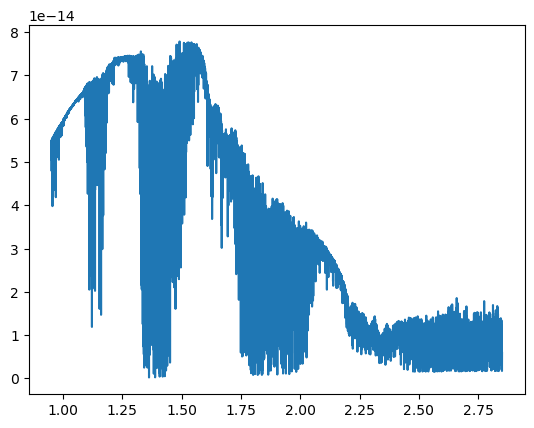

In [22]:
import matplotlib.pyplot as plt

plt.plot(shiftspec[0,:],shiftspec[1,:])

Text(0.5, 0, 'Wavelength / $\\mu m$')

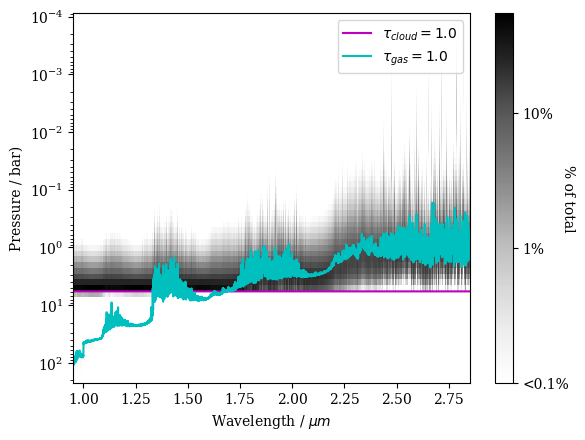

In [19]:
# This one plots a contribution function 
# get diagnostics along with the spectrum

from astropy.convolution import Gaussian1DKernel
from astropy.convolution import convolve, convolve_fft
import matplotlib.colors as colors

gnostics = 1
shiftspec, clphotspec, ophotspec,cfunc = test_module.modelspec(params_instance,args_instance.re_params,args_instance,gnostics)

nwave = args_instance.inwavenum.size
cfunc = np.reshape(cfunc[0,:,:],[cfunc.shape[1],cfunc.shape[2]])
fwhm = 0.0
wlen = shiftspec.shape[1]
wint =  shiftspec[0,0] - shiftspec[0,wlen-1]
# convolve with instrumental profile
# start by setting up kernel
# First step is finding the array index length of the FWHM
disp = wint / wlen
gwidth = int((((fwhm / disp) // 2) * 2) +1)
# needs to be odd
# now get the kernel and convolve
gauss = Gaussian1DKernel(gwidth)

for ilayer in range (0,args_instance.press.size):
    cfunc[:,ilayer] = convolve(cfunc[:,ilayer],gauss,boundary='extend')

tau1_cl_Press = convolve(clphotspec[0],gauss,boundary='extend')[::-1]
tau1_oth_Press = convolve(ophotspec[0],gauss,boundary='extend')[::-1]
    
wavenew = shiftspec[0,::-1]
press = args_instance.press.reshape(64,)
normfunc = np.zeros_like(cfunc)
for iwave in range(0,nwave):
    totcont = np.sum(cfunc[iwave,:])
    normfunc[iwave,:] = cfunc[iwave,:] / totcont

    
plt.rc('font', family='serif')
plt.rc('text', usetex=False)
fig=plt.figure(dpi=100)
# plt.axis([1.0,2.5,1000,1e-1])

ax = fig.add_subplot(1,1,1)

ax.set_yscale('log')
ax.invert_yaxis()
# ax.set_xscale('log')
#major_ticks = np.arange(1.0,15.,1.0)
#minor_ticks = np.arange(1.0,15.,0.5)
#ax.set_xticks(major_ticks)                                                       
#ax.set_xticks(minor_ticks, minor=True)                                           

plt.pcolormesh(wavenew,args_instance.press,(normfunc[::-1,:].transpose()),cmap='Greys',norm=colors.SymLogNorm(linthresh=0.001,linscale=0.00001,
                                              vmin=0., vmax=np.amax(normfunc)))

t1, = plt.plot(wavenew,(tau1_cl_Press),'m-',label=r'$\tau_{cloud} = 1.0$')
t2, = plt.plot(wavenew,(tau1_oth_Press),'c-', label =r'$\tau_{gas} = 1.0$')

plt.legend(handles=[t1,t2])

cbar = plt.colorbar(orientation='vertical',norm=colors.Normalize(clip=False),ticks=[1e-3,1e-2,0.1])
cbar.ax.set_yticklabels(['<0.1%', '1%', '10%'])
cbar.set_label('% of total', rotation=270)
plt.ylabel('Pressure / bar)')
plt.xlabel('Wavelength / $\mu m$')

# plt.savefig("/Users/fw23aao/spidernail/browndwarf_retrieval/LSR1835/LSR1835_figs/paper_figs/v2_figs/contributionF_max.pdf",format='pdf', dpi=100)
#plt.savefig(runname+'_contribution.png',format='png', dpi=120)

In [11]:
import cloud_dic_new


cloudparams=cloud_dic_new.cloud_unpack(re_params,params_instance)
cloudprof,cloudrad,cloudsig = cloud_dic_new.atlas(re_params,cloudparams,args_instance.press)

In [ ]:
for key, value in vars(args_instance).items():
    print(f"{key}: {value}")
